# Data Acquisition

In [24]:
import json
import numpy as np
import pandas as pd

f = open('floopData02-16-2022-21-06-37.json')
data = json.load(f)
a = np.array(data,dtype=object)
alist = []

num = 0

for i in a:
    length = len(a[num])
    alist.append(length)
    num += 1

b = np.array(alist)


In [25]:
import nltk
nltk.download('nps_chat')
nltk.download('punkt')
from nltk.corpus import nps_chat

Question_Words = [ 'where','how','why','did','do','does',"isn't",'has','am i', 'are','can','could','is','may',"can't", 
"didn't",'will','when',"doesn't","haven't",'have','what',"aren't",'would',"couldn't","wouldn't","won't","shouldn't",'should']

questionList = []

posts = nltk.corpus.nps_chat.xml_posts()[:10000]
    #input chat posts
    # 2. Tokenize sentences using NLTK's word_tokenize
    # return dict of tokenized words

def post_features(post):
    features = {}
    for word in nltk.word_tokenize(post):
        features['contains({})'.format(word.lower())] = True

    return features

#feature=dialogue_act_features(posts)

    #Input: none
    #  1. Divide data into 80% training and 10% testing sets
    # 2. Use NLTK's Multinomial Naive Bayes to perform classifcation    
    # Return: Classifier object

def __perform_classification():
        featuresets = [(post_features(post.text), post.get('class')) for post in posts]

        #print(f)
        training_size = int(len(featuresets) * 0.1)
        train_set, test_set = featuresets[training_size:], featuresets[:training_size]

        classifier = nltk.NaiveBayesClassifier.train(train_set)

        #$print(classifier)
        return classifier



cl= __perform_classification()


types = ["whQuestion","ynQuestion","Statement"]
# Input a sentence
# returns the type sentence
def is_ques(ques):
    question_type = cl.classify(post_features(ques)) 

    return  question_type



    # Method : IsQuestion
    # Input: Sentence to be predicted
    # Return: type of sentence it is using nltk  
def IsQuestion(sentence):
    type=is_ques(sentence)
    #print("type is"+type) 
    first_word = sentence.split()[0].lower()  


    if  ((type=="whQuestion" or type== "ynQuestion") or (first_word in Question_Words ))  :

        return 1

    elif type=="Other" or type== "Reject":
        return 2  

    else:        
        return 0

for j in a:
    changeStr = ' '.join([str(elem) for elem in j])
    check = IsQuestion(changeStr)
    #if check == "NaN":
        #print(changeStr)
    questionList.append(check)

# print(questionList)

[nltk_data] Downloading package nps_chat to
[nltk_data]     C:\Users\jiajh\AppData\Roaming\nltk_data...
[nltk_data]   Package nps_chat is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jiajh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [26]:
import string
from collections import Counter
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

sentimentList = []
keywordList = []

key_words = ["noticed", "like", "feel", "realize", "want", "success", "change", "transform", "convert", "evaluate", 
"estimate", "measure", "compartmentalize", "create", "cause", "effect", "achieve", "accomplish", "important", "significant",
"consider", "believe", "think", "recall", "remind", "attention", "regard", "interest", "lirst", "last",
"explain", "decide", "determine", "identify", "influence", "affect", "put"]

def sentiment_analyse(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    if score['neg'] > score['pos']:
        return 0
    elif score['neg'] < score['pos']:
        return 1
    else:
        return 2
        
def clean_sentence(feedback):
    lower_case = feedback.lower()
    cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))
    
    return cleaned_text

def key_words_search(feedback):
    tokenized_words = feedback.split()
    lemma_words = []
    count_key = 0
    
    for word in tokenized_words:
        word = WordNetLemmatizer().lemmatize(word)
        lemma_words.append(word)
        
    for word in lemma_words:
        if word in key_words:
            count_key = count_key + 1
    
    return count_key
    
for h in a:
    changeStr = ' '.join([str(elem) for elem in h])
    cleaned_text = clean_sentence(changeStr)
    keyword = key_words_search(cleaned_text)
    result = sentiment_analyse(cleaned_text)
    sentimentList.append(result)
    keywordList.append(keyword)

#print(keywordList)
#print(sentimentList)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jiajh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jiajh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jiajh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [128]:
df = pd.DataFrame({"cover_length": b, "question":questionList, "keywords": keywordList, "sentiment":sentimentList})
print("question True:1 False:0 another:2, keywords: frequency, sentiment: Positive:1 Negative:0 Neutral:2")
df.head()

question True:1 False:0 another:2, keywords: frequency, sentiment: Positive:1 Negative:0 Neutral:2


,cover_length,question,keywords,sentiment
0,1,0,0,2
1,1,0,0,1
2,2,0,1,1
3,5,0,0,1
4,1,0,0,2


## Assumptions:  feedback got more replies than the average it is good

In [129]:
df["good_feedback"] = df["cover_length"] > df["cover_length"].mean()
df.head()


,cover_length,question,keywords,sentiment,good_feedback
0,1,0,0,2,False
1,1,0,0,1,False
2,2,0,1,1,True
3,5,0,0,1,True
4,1,0,0,2,False


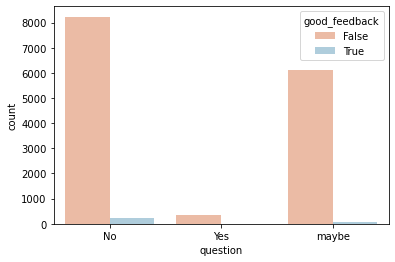

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.countplot(x='question', hue='good_feedback', data=df, palette='RdBu')
plt.xticks([0,1,2], ['No', 'Yes', 'maybe'])
plt.show()

# Visualizing and Numerical EDA for the good feedback

In [74]:
good_feedback = df[df["good_feedback"] == True]
print(good_feedback.describe())

       cover_length    question    keywords   sentiment
count    306.000000  306.000000  306.000000  306.000000
mean       2.604575    0.535948    0.362745    1.153595
std        1.091177    0.868586    1.063146    0.686595
min        2.000000    0.000000    0.000000    0.000000
25%        2.000000    0.000000    0.000000    1.000000
50%        2.000000    0.000000    0.000000    1.000000
75%        3.000000    1.750000    0.000000    2.000000
max        8.000000    2.000000   13.000000    2.000000


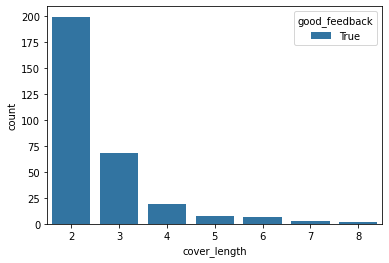

In [107]:
plt.figure()
sns.countplot(x='cover_length', hue='good_feedback', data=good_feedback)
plt.show()

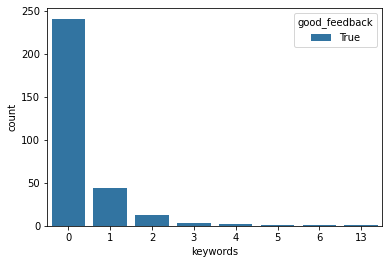

In [106]:
plt.figure()
sns.countplot(x='keywords', hue='good_feedback', data=good_feedback)
plt.show()

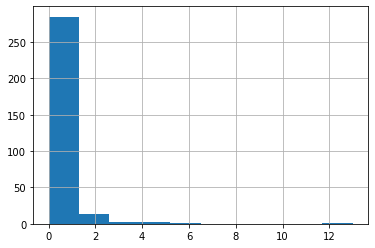

In [90]:
plt.figure()
sns.countplot(x='sentiment', hue='good_feedback', data=good_feedback)
plt.xticks([0,1,2], ['Negative', 'Positive', 'Neutral'])
plt.show()

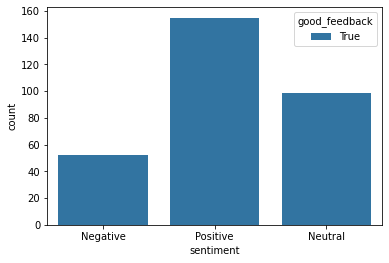

In [105]:
plt.figure()
sns.countplot(x='sentiment', hue='good_feedback', data=good_feedback)
plt.xticks([0,1,2], ['Negative', 'Positive', 'Neutral'])
plt.show()

# Fit a k-Nearest neighbors classifier and Predict k-Nearest neighbors with training data set

In [142]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

newDF = df
newDF.head()

y = newDF['good_feedback'].values
X = newDF.drop('good_feedback', axis=1).values

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X,y)

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the output
prediction = knn.predict(X_train)
print("Prediction: {}".format(prediction))
print(knn.score(X_test, y_test))

Prediction: [False False False ... False False False]
0.9796666666666667
